
Single Linkage Clusters:
Cluster 1: [14]
Cluster 2: [0, 13, 8, 9, 10, 11, 3, 1, 4, 6, 15]
Cluster 3: [12, 2, 5, 7]


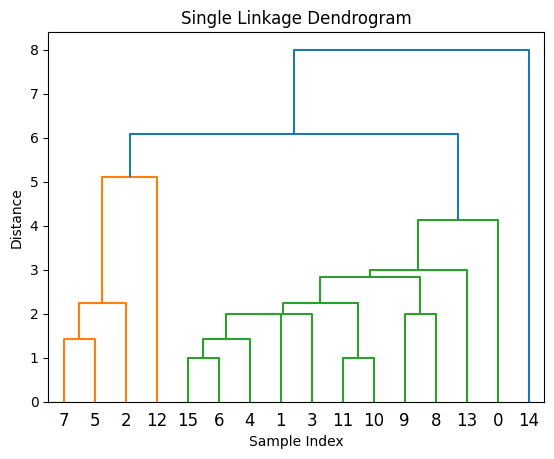


Complete Linkage Clusters:
Cluster 1: [14]
Cluster 2: [12, 2, 5, 7]
Cluster 3: [8, 9, 3, 4, 1, 6, 15, 0, 13, 10, 11]


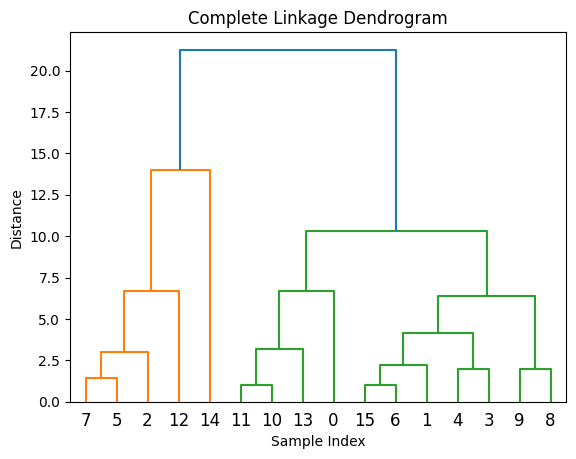


Average Linkage Clusters:
Cluster 1: [14]
Cluster 2: [12, 2, 5, 7]
Cluster 3: [0, 13, 10, 11, 1, 4, 6, 15, 3, 8, 9]


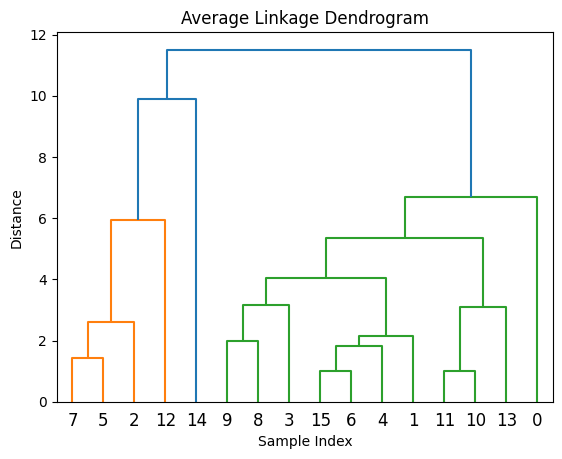


Centroid Linkage Clusters:
Cluster 1: [14]
Cluster 2: [12, 2, 5, 7]
Cluster 3: [0, 13, 10, 11, 1, 4, 6, 15, 3, 8, 9]


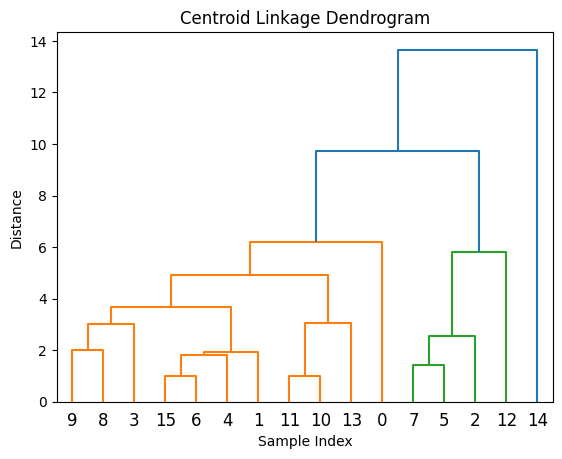

In [1]:
import math
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def single_linkage(cluster1, cluster2, distances):
    return min(distances.get((min(i, j), max(i, j)), float('inf')) for i in cluster1 for j in cluster2)

def complete_linkage(cluster1, cluster2, distances):
    return max(distances.get((min(i, j), max(i, j)), 0) for i in cluster1 for j in cluster2)

def average_linkage(cluster1, cluster2, distances):
    dist_sum = sum(distances.get((min(i, j), max(i, j)), 0) for i in cluster1 for j in cluster2)
    return dist_sum / (len(cluster1) * len(cluster2))

def centroid_linkage(cluster1, cluster2, points):
    centroid1 = (sum(points[i][0] for i in cluster1) / len(cluster1),
                 sum(points[i][1] for i in cluster1) / len(cluster1))
    centroid2 = (sum(points[i][0] for i in cluster2) / len(cluster2),
                 sum(points[i][1] for i in cluster2) / len(cluster2))
    return distance(centroid1, centroid2)

def get_linkage_function(linkage_type):
    if linkage_type == 'single':
        return single_linkage
    elif linkage_type == 'complete':
        return complete_linkage
    elif linkage_type == 'average':
        return average_linkage
    elif linkage_type == 'centroid':
        return centroid_linkage
    else:
        raise ValueError(f"Invalid linkage type: {linkage_type}")

def agglomerative_clustering(points, k, linkage_type):
    n = len(points)
    clusters = [[i] for i in range(n)]

    distances = {}
    for i in range(n):
        for j in range(i + 1, n):
            distances[(i, j)] = distance(points[i], points[j])

    linkage_func = get_linkage_function(linkage_type)

    while len(clusters) > k:
        min_distance = float('inf')
        merge_i, merge_j = -1, -1
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster_distance = linkage_func(clusters[i], clusters[j], distances) if linkage_type != 'centroid' else linkage_func(clusters[i], clusters[j], points)
                if cluster_distance < min_distance:
                    min_distance = cluster_distance
                    merge_i, merge_j = i, j

        cluster1 = clusters[merge_i]
        cluster2 = clusters[merge_j]
        new_cluster = cluster1 + cluster2
        clusters = [c for i, c in enumerate(clusters) if i not in (merge_i, merge_j)] + [new_cluster]

    return clusters

def plot_dendrogram(points, title):
    Z = linkage(points, method=title)
    dendrogram(Z, distance_sort='descending')
    plt.title(f'{title.capitalize()} Linkage Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

points = [(1, 2), (2, 6), (12, 10), (3, 10), (3, 8), (14, 9), (4, 6),
          (15, 10), (6, 9), (6, 11), (6, 5), (7, 5), (15, 4), (7, 2),
          (15, 18), (4, 7)]

k = 3
linkage_types = ['single', 'complete', 'average', 'centroid']

for linkage_type in linkage_types:
    clusters = agglomerative_clustering(points, k, linkage_type)
    print(f"\n{linkage_type.capitalize()} Linkage Clusters:")
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i + 1}: {cluster}")
    plot_dendrogram(points, linkage_type)




linkage method :single, cluster labels :[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
linkage method :complete, cluster labels :[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
linkage method :average, cluster labels :[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2

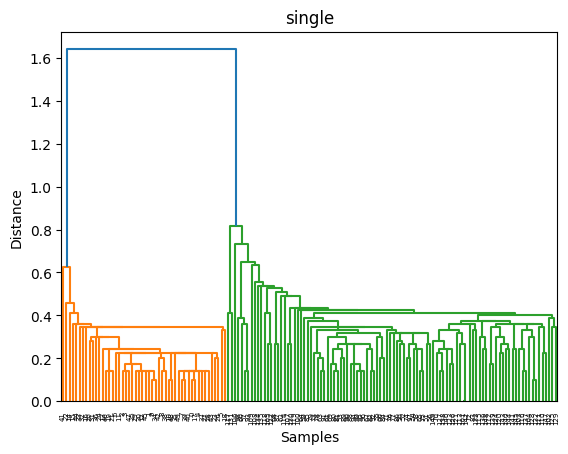

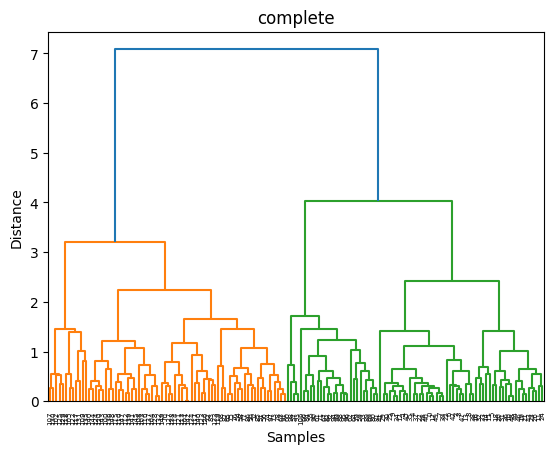

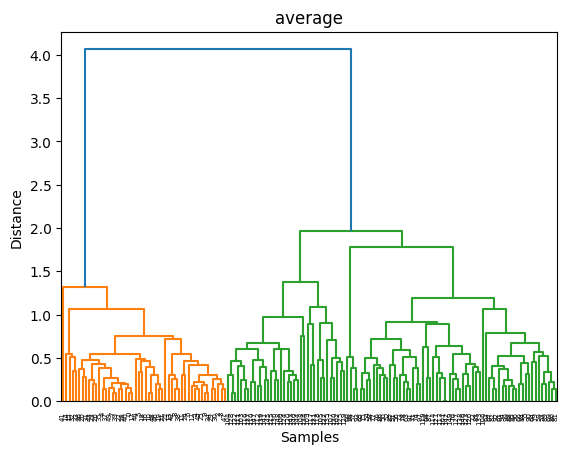

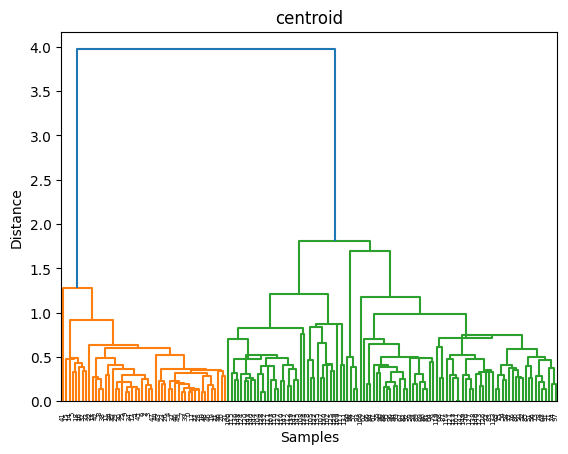

In [2]:
# using sklearn


import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
x = iris.data
y = iris.target

def plot_dendrogram(data,method):
    linked = linkage(data,method)
    dendrogram(linked)
    plt.title(method)
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

linkage_methods = ["single","complete","average","centroid"]
n_clusters = 3
for i in range(len(linkage_methods)-1):
    model = AgglomerativeClustering(n_clusters = n_clusters,linkage = linkage_methods[i])
    labels_pred = model.fit_predict(x)
    print(f"linkage method :{linkage_methods[i]}, cluster labels :{labels_pred}")
for i in linkage_methods:
    plot_dendrogram(x,i)